## IMPORT LIBRARIES

In [1]:
# IMPORTING NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD DATA

In [2]:
# READING DATA FROM CSV FILES
df_x = pd.read_csv('linearX.csv')
df_y = pd.read_csv('linearY.csv')

In [3]:
# CONVERTING TO NUMPY ARRAYS

X_raw = df_x.values.flatten()
y = df_y.values.flatten()

In [4]:
# PRINTING FIRST 5 VALUES TO VERIFY
print('X DATA HEAD --> ', X_raw[:5])
print('Y DATA HEAD --> ', y[:5])

X DATA HEAD -->  [8.  9.1 8.4 6.9 7.7]
Y DATA HEAD -->  [0.99007 0.99769 0.99386 0.99508 0.9963 ]


## DATA PREPROCESSING

In [5]:
# PREPROCESSING: Z-SCORE NORMALIZATION (STANDARDIZATION)
# FORMULA: Z = (X - MEAN) / STD_DEV
# THIS HELPS GRADIENT DESCENT CONVERGE FASTER

# CALCULATING MEAN AND STANDARD DEVIATION 

mean_x = np.sum(X_raw) / len(X_raw)
std_x = np.sqrt(np.sum((X_raw - mean_x)**2) / len(X_raw))

# APPLYING NORMALIZATION
X = (X_raw - mean_x) / std_x

In [6]:
print(f"MEAN OF X --> {mean_x:.4f}")
print(f"STD DEV OF X --> {std_x:.4f}")

MEAN OF X --> 8.0515
STD DEV OF X --> 1.7286


## DATA VISUALIZATION

ORIGINAL DATA

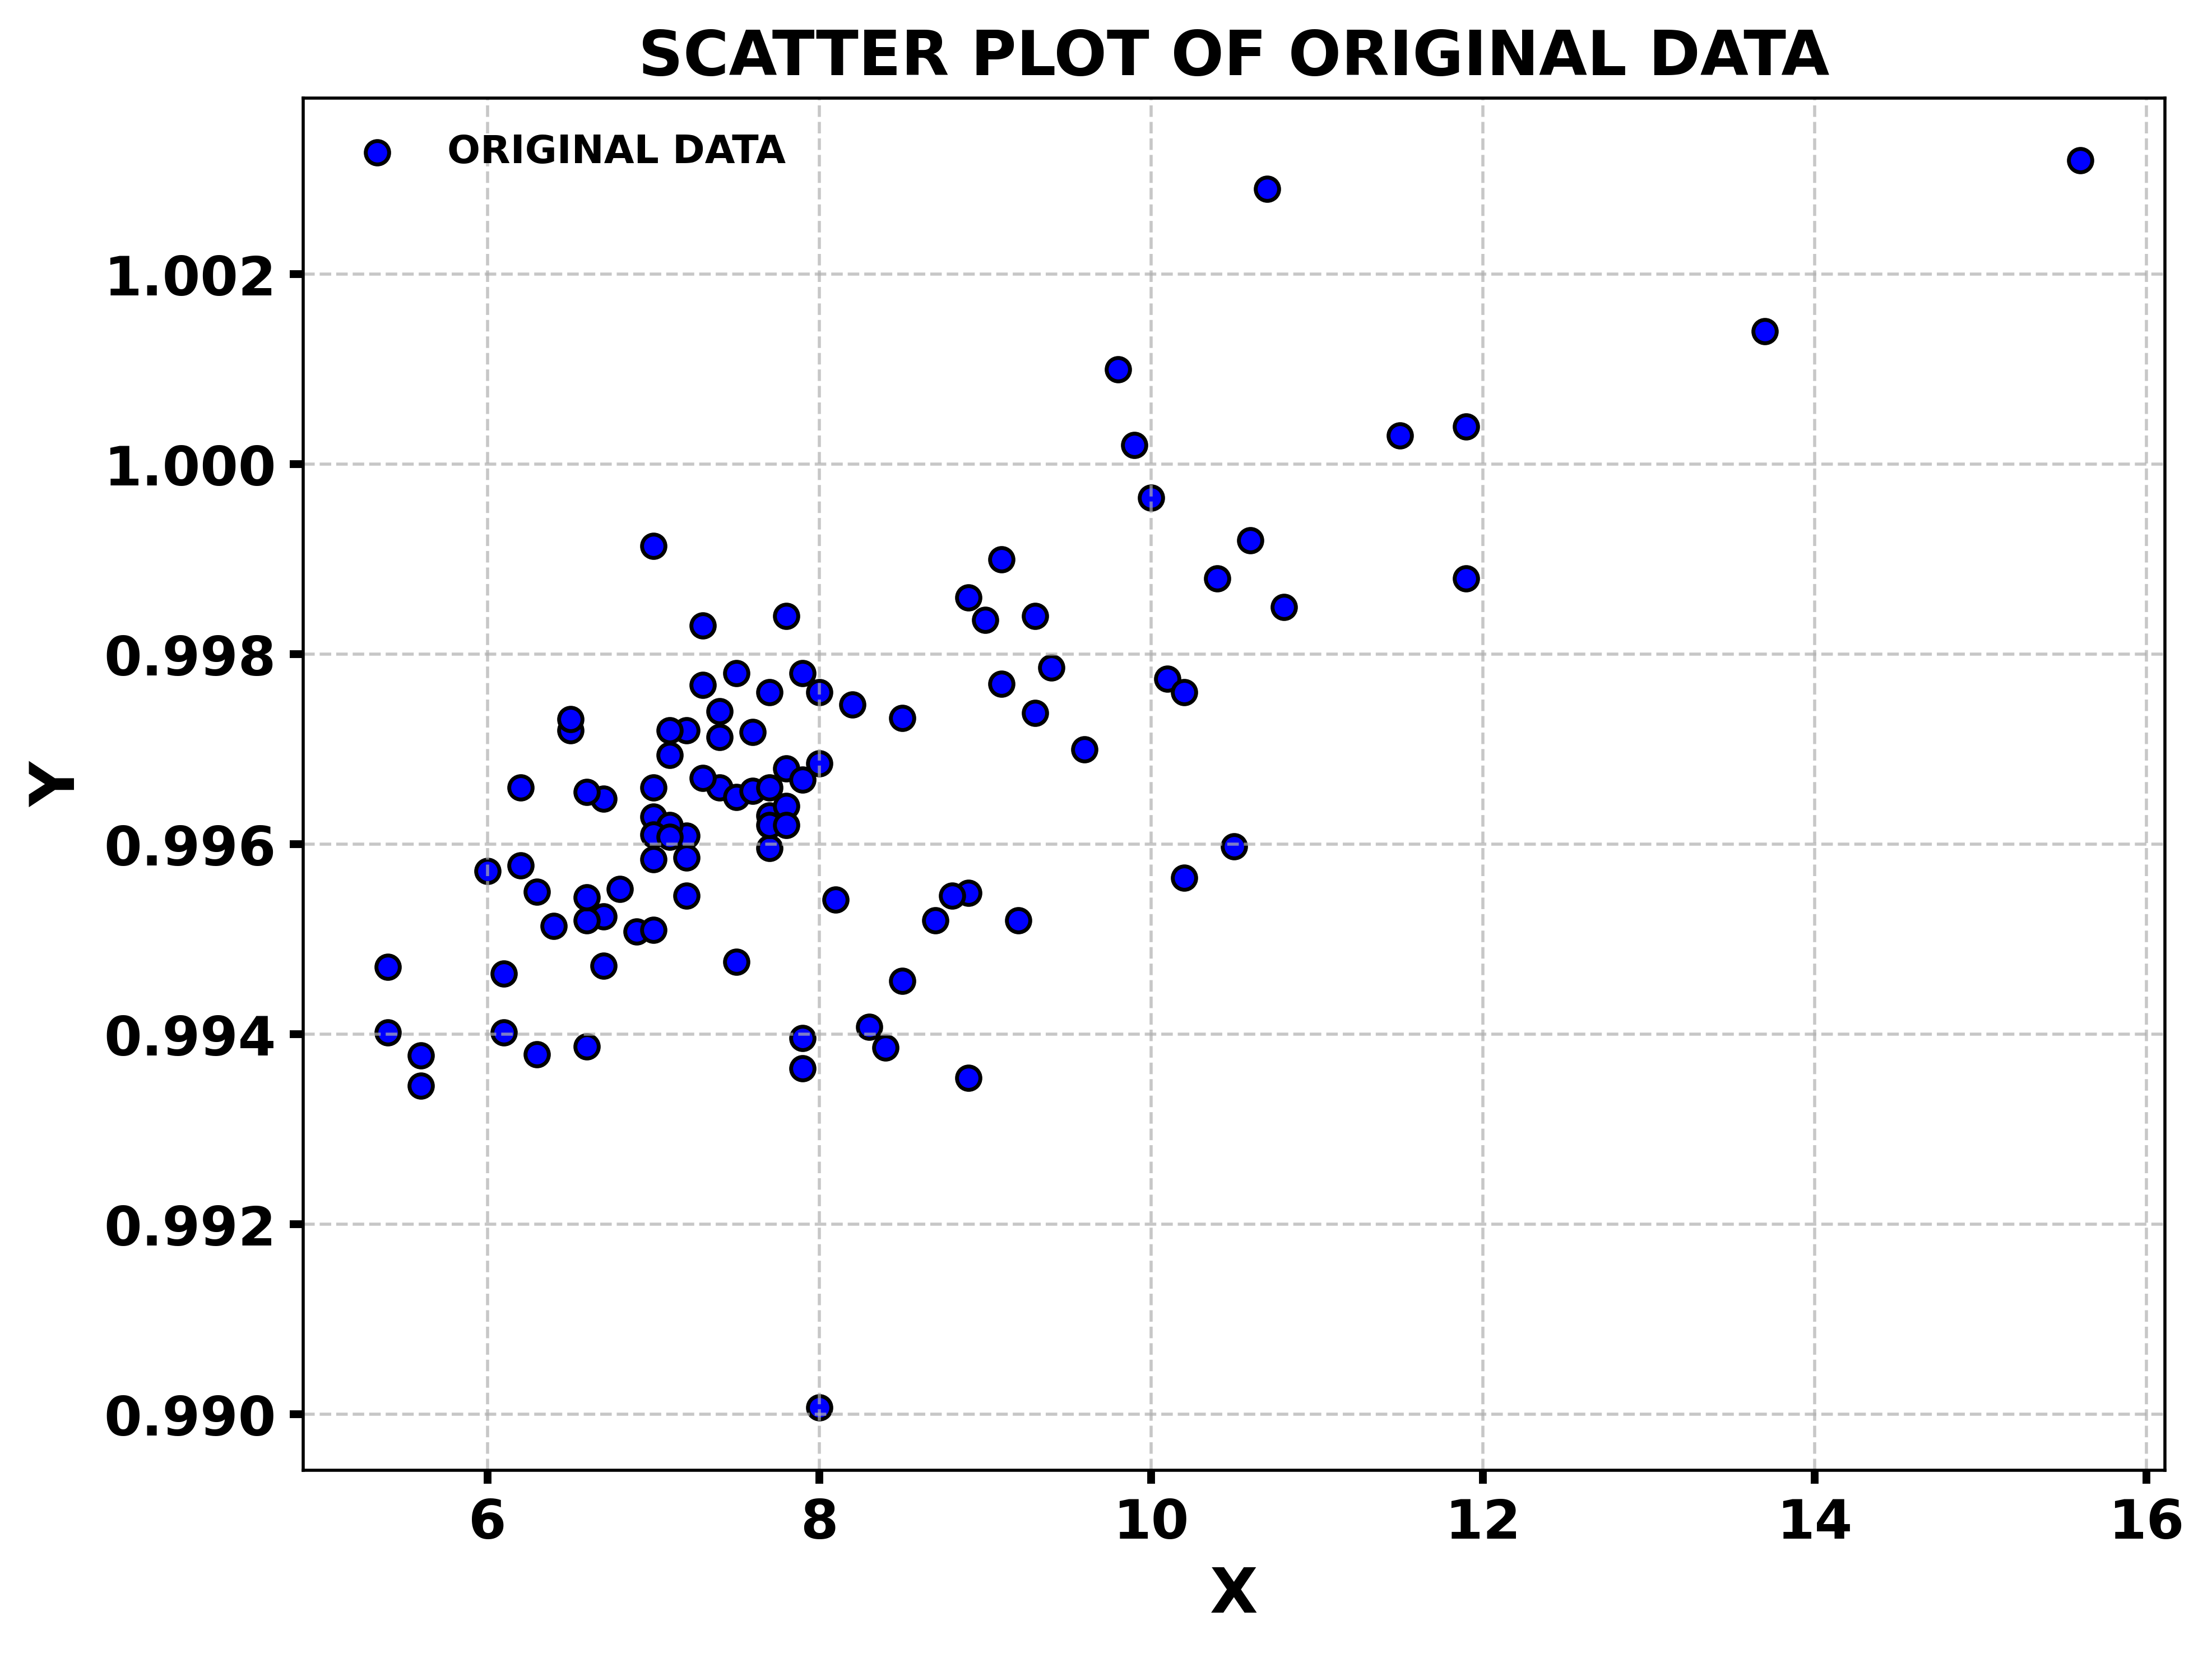

In [9]:
plt.figure(figsize = (8,6), dpi = 500)
plt.scatter(df_x, df_y, color = 'blue', edgecolors = 'black', label = 'ORIGINAL DATA')
plt.title('SCATTER PLOT OF ORIGINAL DATA', fontsize = 16, fontweight = 'bold')
plt.xlabel('X', fontsize = 16, fontweight = 'bold')
plt.ylabel('Y', fontsize = 16, fontweight = 'bold')
plt.tick_params(axis = 'both', which = 'major', labelsize = 14, width = 2)

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc = 'upper left', fontsize = 16, frameon = False, prop = {'weight' : 'bold'})
plt.tight_layout()
plt.show()

NORMALIZED DATA

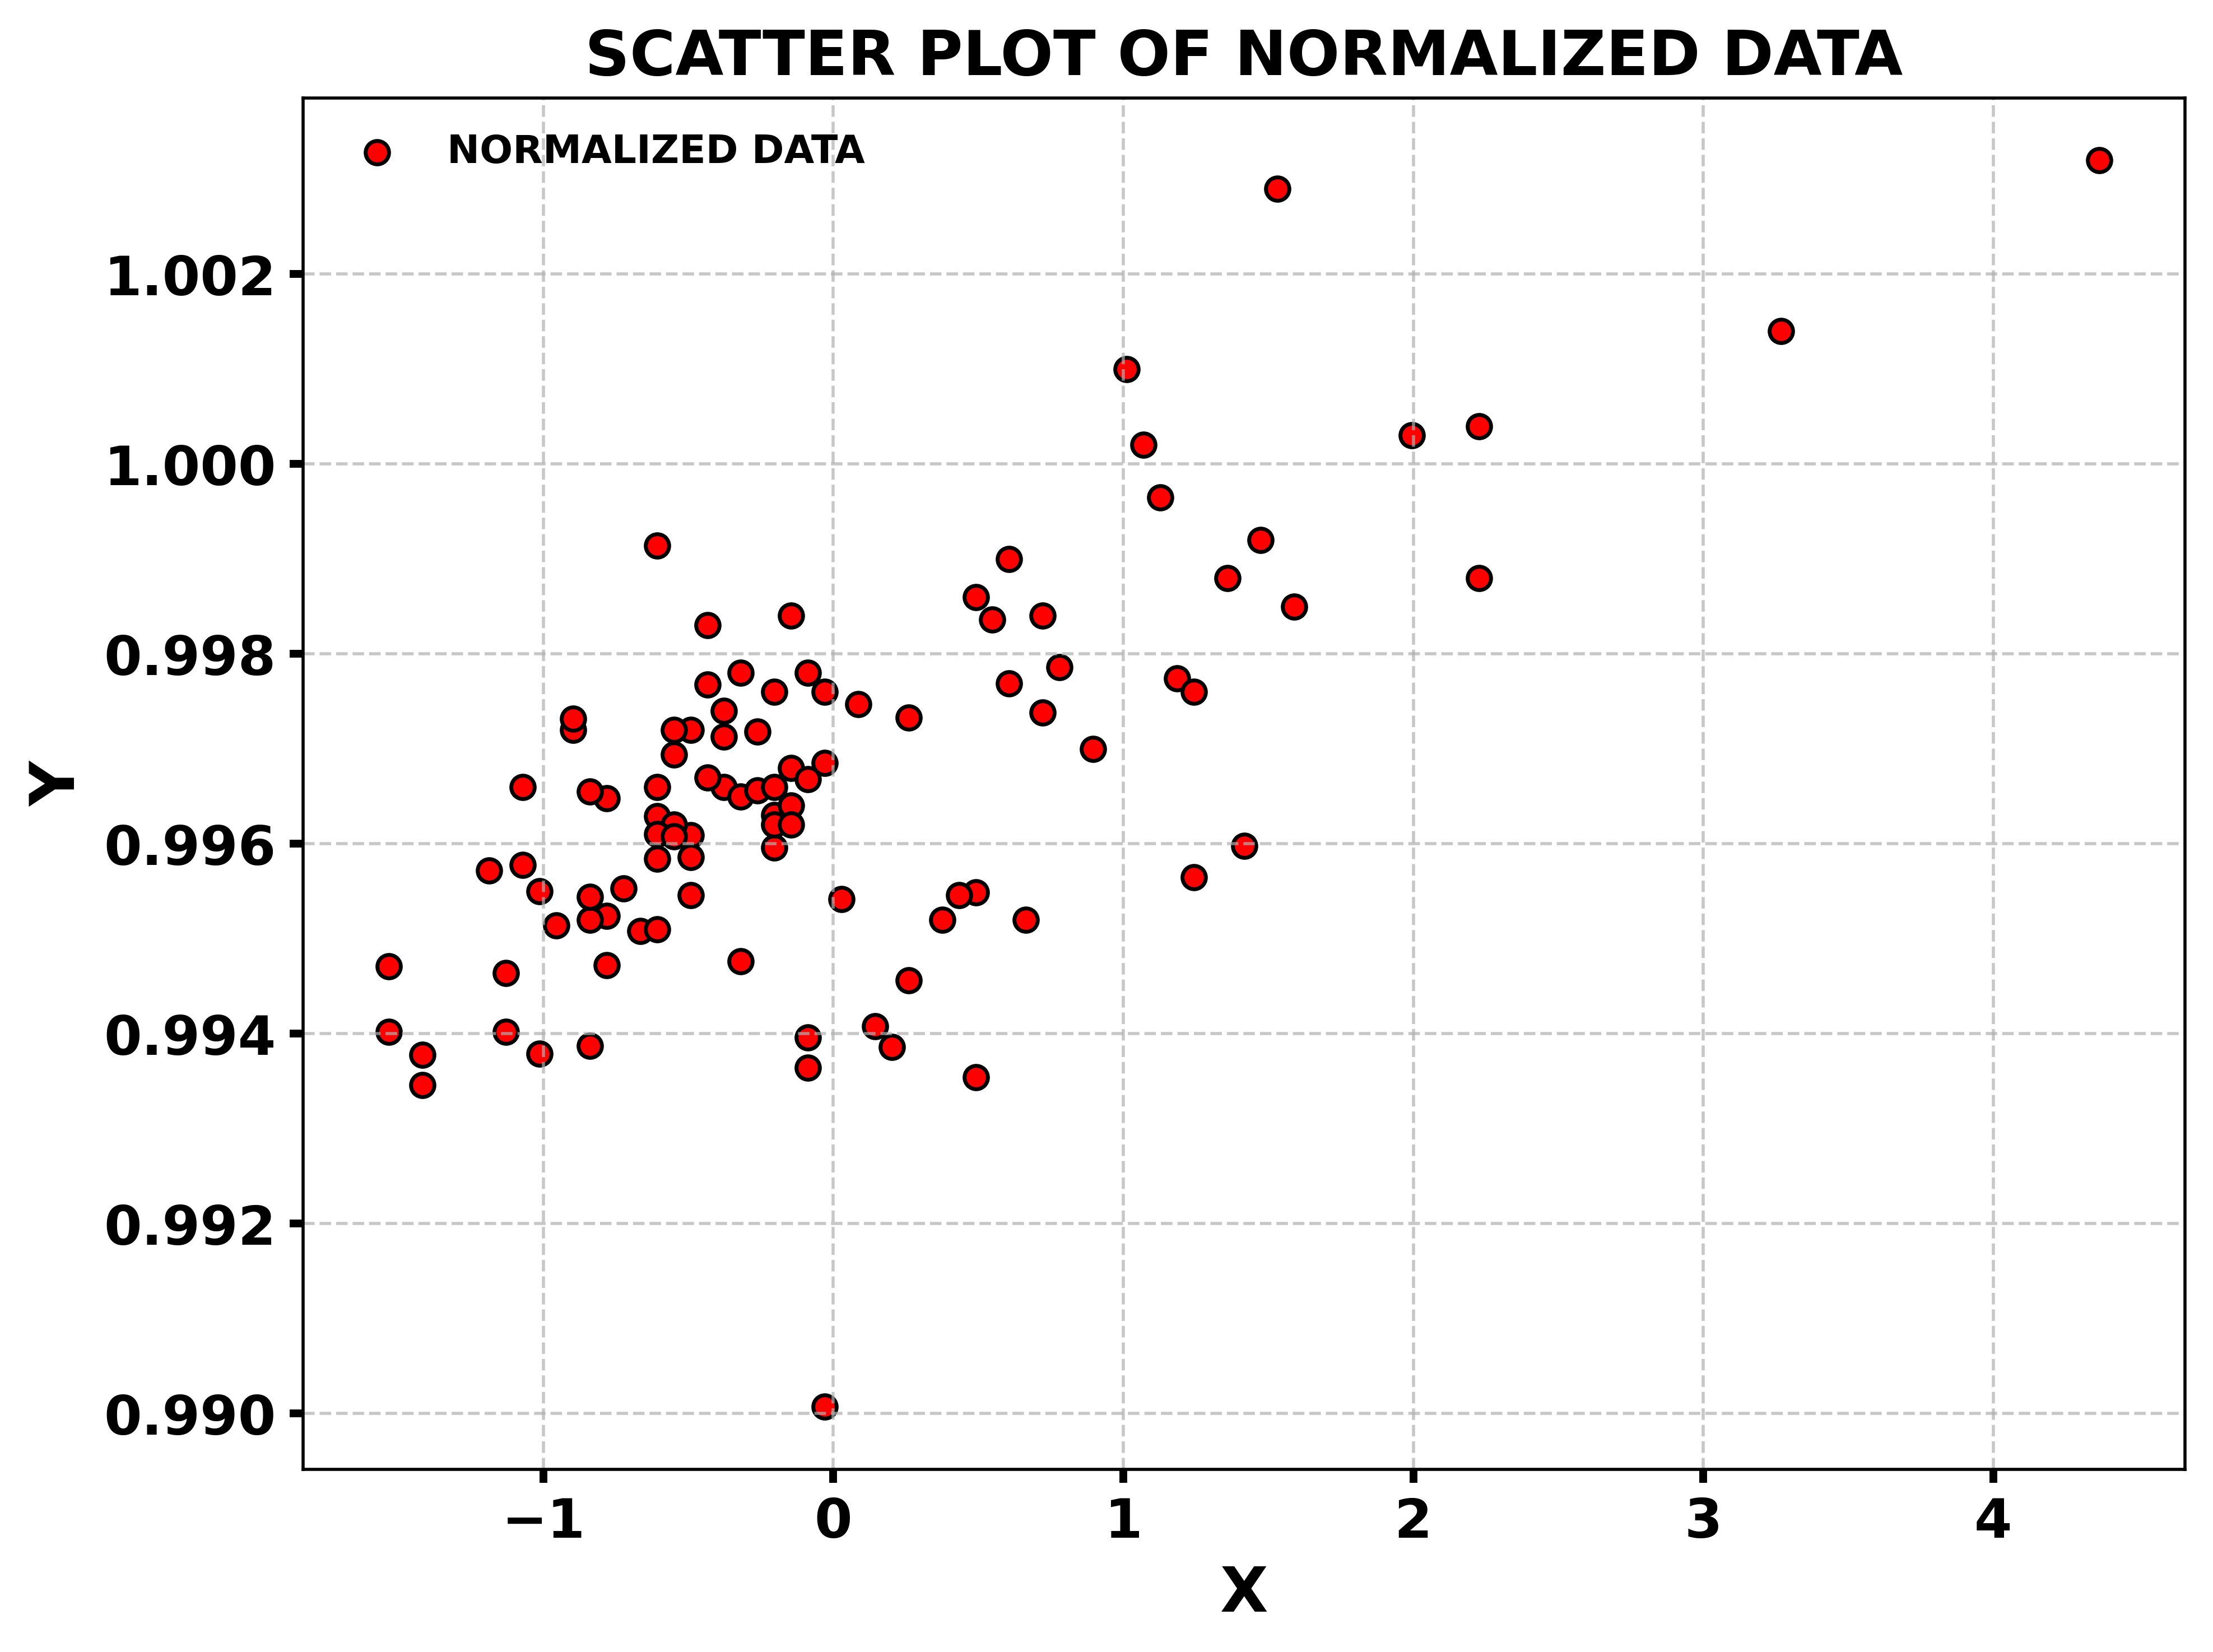

In [ ]:
plt.figure(figsize = (8,6), dpi = 500)
plt.scatter(X, y, color = 'red', edgecolor = 'black', label = "NORMALIZED DATA")
plt.title("SCATTER PLOT OF NORMALIZED DATA", fontsize = 16, fontweight = 'bold')
plt.xlabel("X", fontsize = 16, fontweight = 'bold')
plt.ylabel("Y", fontsize = 16, fontweight = 'bold')
plt.tick_params(axis = 'both', which = 'major', labelsize = 14, width = 2)

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc = 'upper left', fontsize = 16, frameon = False, prop = {'weight' : 'bold'})
plt.tight_layout()
plt.show()


HISTOGRAM PLOT

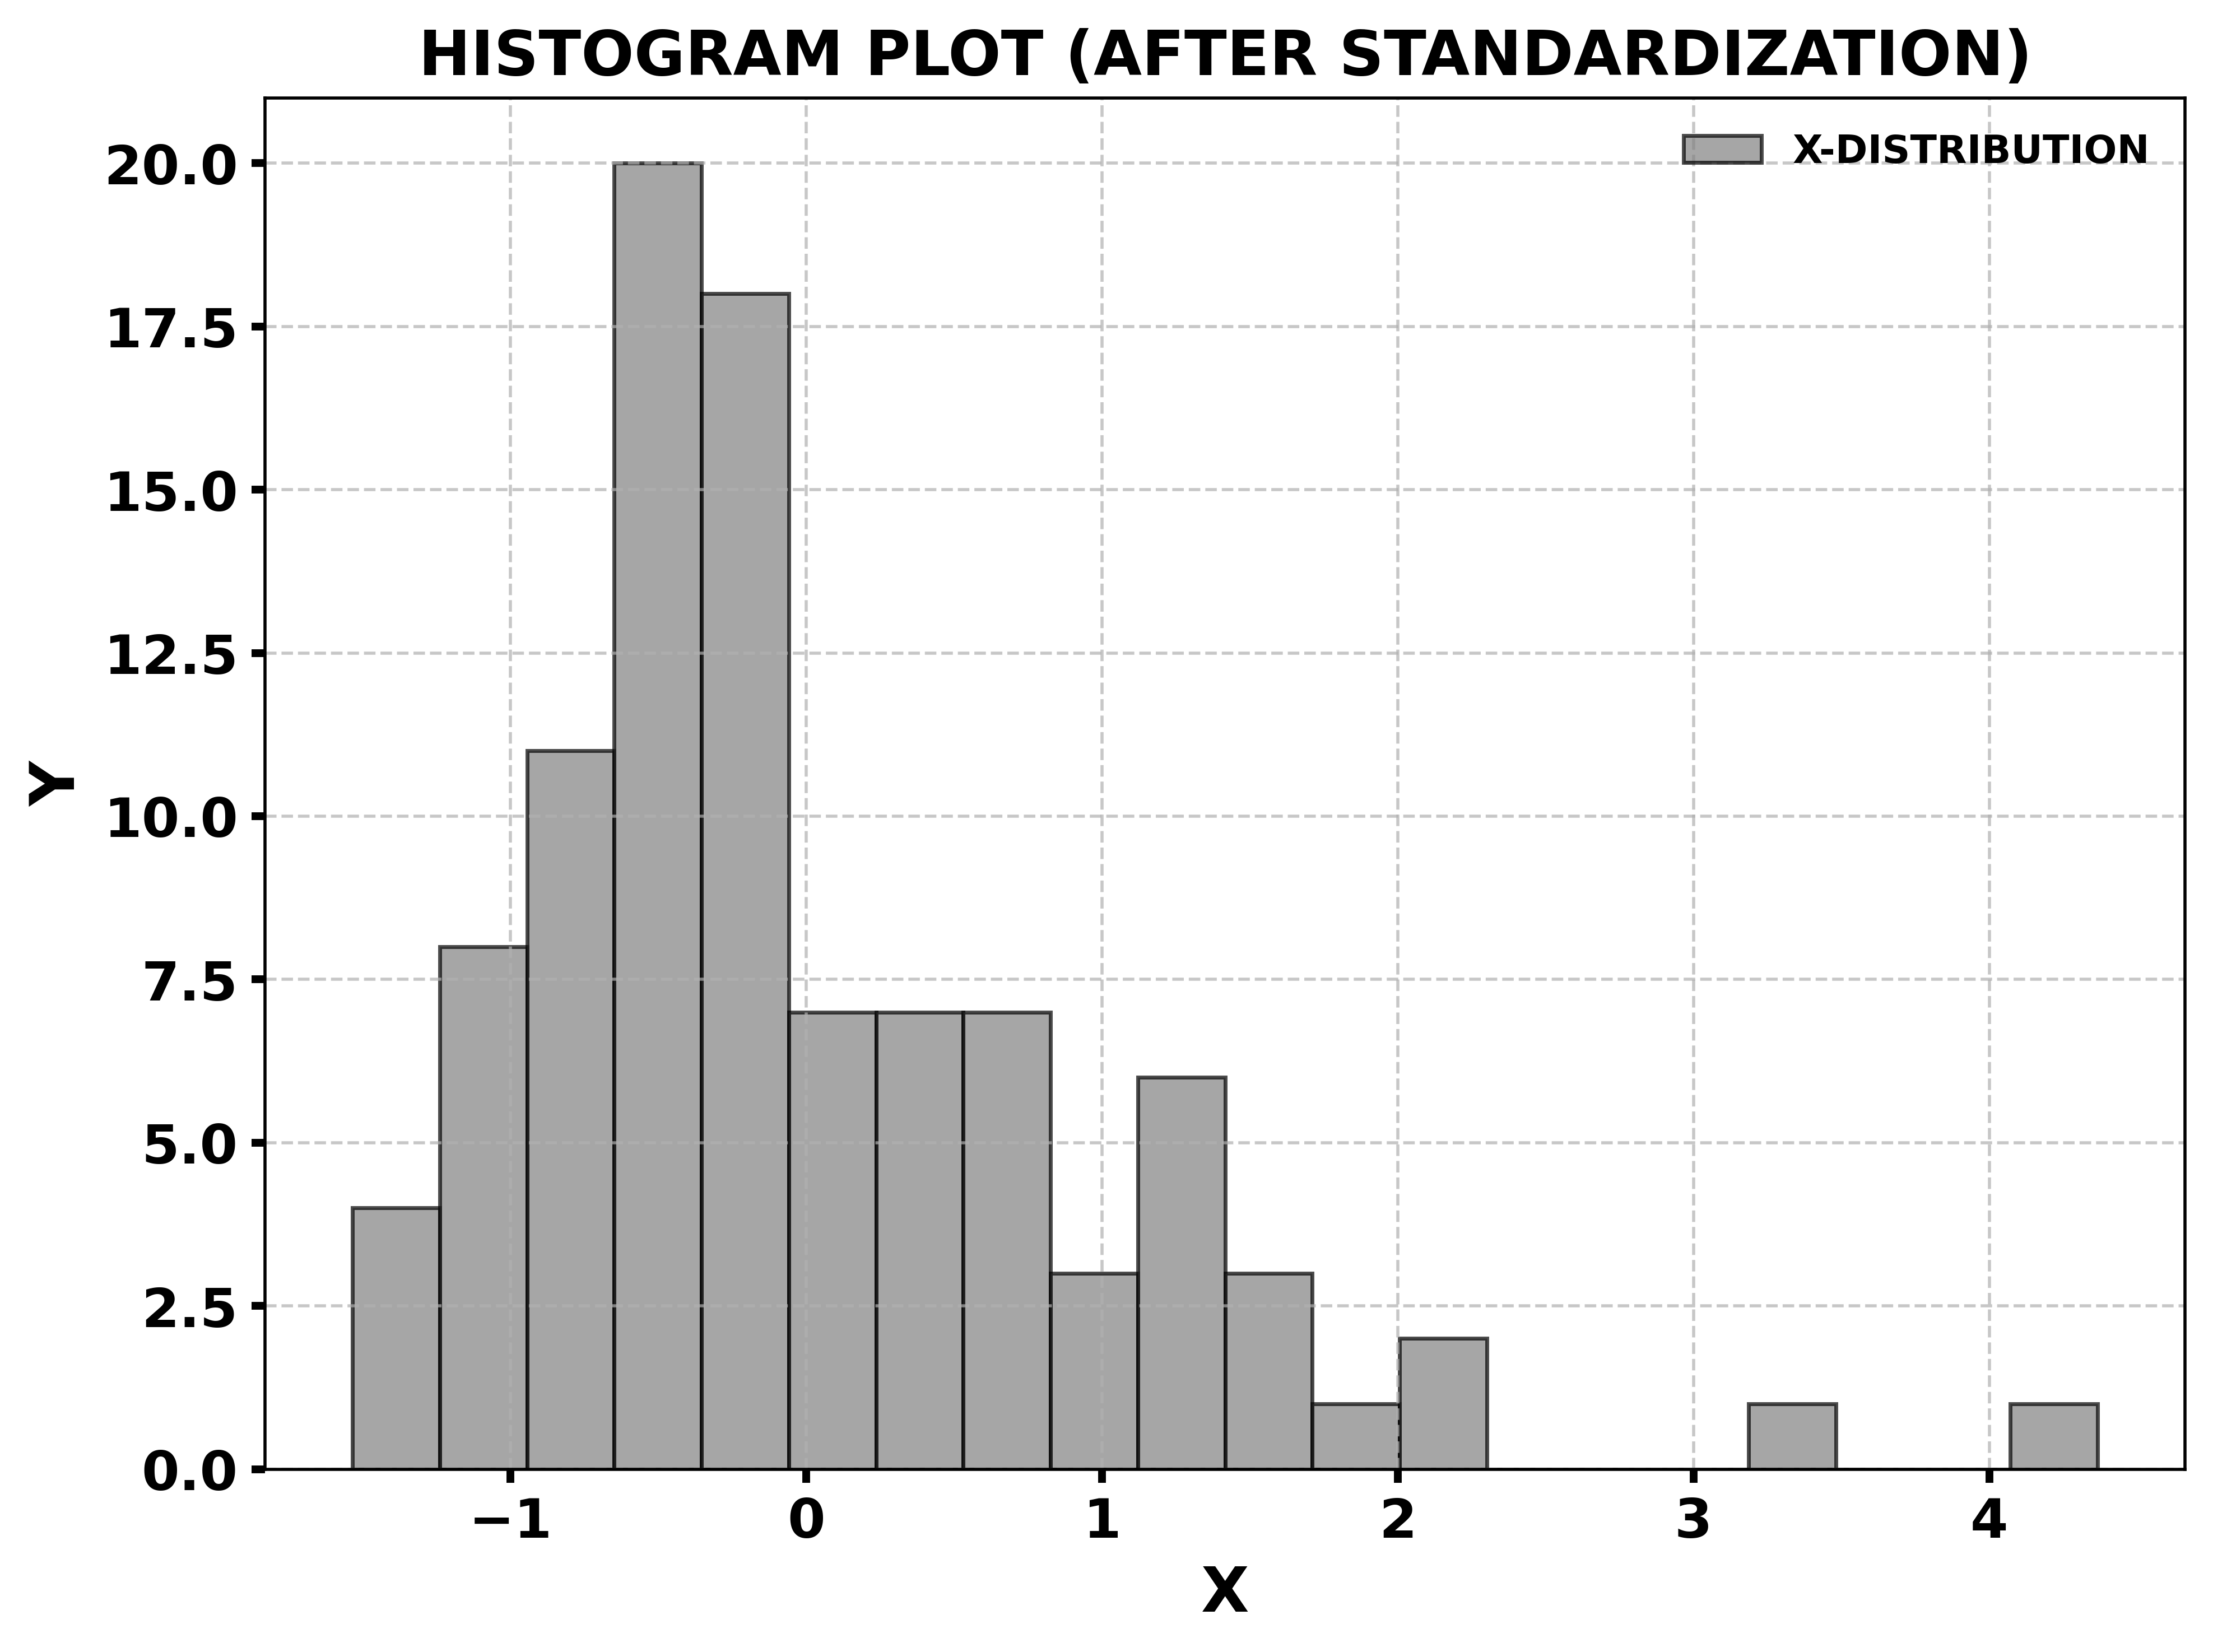

In [15]:
plt.figure(figsize = (8,6), dpi = 500)
plt.hist(X, bins = 20, color = 'grey', edgecolor = 'black',  alpha = 0.7, label = 'X-DISTRIBUTION')
plt.title('HISTOGRAM PLOT (AFTER STANDARDIZATION)', fontsize = 16, fontweight = 'bold')
plt.xlabel('X', fontsize = 16, fontweight = 'bold')
plt.ylabel('Y', fontsize = 16, fontweight = 'bold')
plt.tick_params(axis = 'both', which = 'major', labelsize = 14, width = 2)

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels(): 
    label.set_fontweight('bold')
    
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend(loc='upper right', fontsize=16, frameon=False, prop={'weight' : 'bold'})
plt.tight_layout()
plt.show()

## LINEAR REGRESSION CLASS IMPLEMENTATION

NO SCIKIT-LEARN

In [58]:
class LinearRegression:
    
    # INITIALIZING HYPERPARAMETERS
    def __init__(self, learning_rate = 0.5, iterations = 50, convergence = 1e-6):
        self.lr = learning_rate
        self.iterations = iterations
        self.convergence = convergence
        
        self.weights = None
        self.bias = None
        self.cost_history = []

    # COST FUNCTION
    def cost_function(self, X, y, weights, bias):
        # MSE --> J(w,b) = (1/2m) * SUM((y_pred - y)^2)
        m = len(y)
        predictions = weights * X + bias
        error = predictions - y
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        return cost
    
    # TRAINING USING GRADIENT DESCENT
    def train(self, X, y, method = 'batch', batch_size = 5):
        # INITIALIZING PARAMETERS TO ZERO
        self.weights = 0.0
        self.bias = 0.0
        self.cost_history = []
        m = len(y)
        
        # GRADIENT DESCENT LOOP
        for i in range(self.iterations):
            
            if method == 'batch':
                # BATCH GRADIENT DESCENT: USE ALL DATA POINTS
                predictions = self.weights * X + self.bias
                error = predictions - y
                
                # CALCULATING GRADIENTS
                dw = (1 / m) * np.sum(error * X)
                db = (1 / m) * np.sum(error)
                
                # UPDATING PARAMETERS
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
            
            elif method == 'stochastic':
                # STOCHASTIC GRADIENT DESCENT (SGD): USE 1 RANDOM DATA POINT
                idx = np.random.randint(0, m)
                X_i = X[idx]
                Y_i = y[idx]
                
                prediction = self.weights * X_i + self.bias
                error = prediction - Y_i
                
                dw = error * X_i
                db = error
                
                self.weights -= self.lr * dw
                self.bias -= self.lr * db
            
            elif method == 'minibatch':
                # MINI-BATCH GRADIENT DESCENT: USE A SMALL BATCH OF DATA
                indices = np.random.permutation(m)
                X_shuffled = X[indices]
                y_shuffled = y[indices]
                
                for j in range(0, m, batch_size):
                    X_batch = X_shuffled[j : j + batch_size]
                    y_batch = y_shuffled[j:j+batch_size]
                    m_batch = len(y_batch)
                    
                    predictions = self.weights * X_batch + self.bias
                    error = predictions - y_batch
                    
                    dw = (1 / m_batch) * np.sum(error * X_batch)
                    db = (1 / m_batch) * np.sum(error)
                    
                    self.weights -= self.lr * dw
                    self.bias -= self.lr * db
            
            # CALCULATE AND STORE COST FOR THIS ITERATION
            current_cost = self.cost_function(X, y, self.weights, self.bias)
            self.cost_history.append(current_cost)
            
            # CONVERGENCE CHECK 
            # FOR BATCH GD MAINLY           
            if i > 0 and abs(self.cost_history[-2] - self.cost_history[-1]) < self.convergence:
                if method == 'batch':
                    print(f"CONVERGED AT ITERATION {i}")
                    break
        
        return self.weights, self.bias, self.cost_history

    def predict(self, X):
        return self.weights * X + self.bias            

## TRAINING WITH LR=0.5

CONVERGENCE ANALYSIS

In [33]:
# INITIALIZING MODEL
model = LinearRegression(learning_rate = 0.5, iterations = 50, convergence = 1e-6)

# TRAINING USING BATCH GRADIENT DESCENT
w_final, b_final, cost_final = model.train(X, y, method = 'batch')

# CONVERGENCE CRITERIA MENTIONED
print("CONVERGENCE CRITERIA --> STOP WHEN ABSOLUTE CHANGE IN COST < 1e-6")

CONVERGED AT ITERATION 10
CONVERGENCE CRITERIA --> STOP WHEN ABSOLUTE CHANGE IN COST < 1e-6


In [39]:
# VALUES AFTER CONVERGENCE
print(f"FINAL COST FUNCTION VALUE --> {cost_final[-1]:.8f}")
print('LEARNING PARAREMETERS -->')
print(f"WEIGHT = {w_final:.4f} & BIAS = {b_final:.4f}")

FINAL COST FUNCTION VALUE --> 0.00000130
LEARNING PARAREMETERS -->
WEIGHT = 0.0014 & BIAS = 0.9961


## PLOTTING COST FUNCTION AND REGRESSION LINE

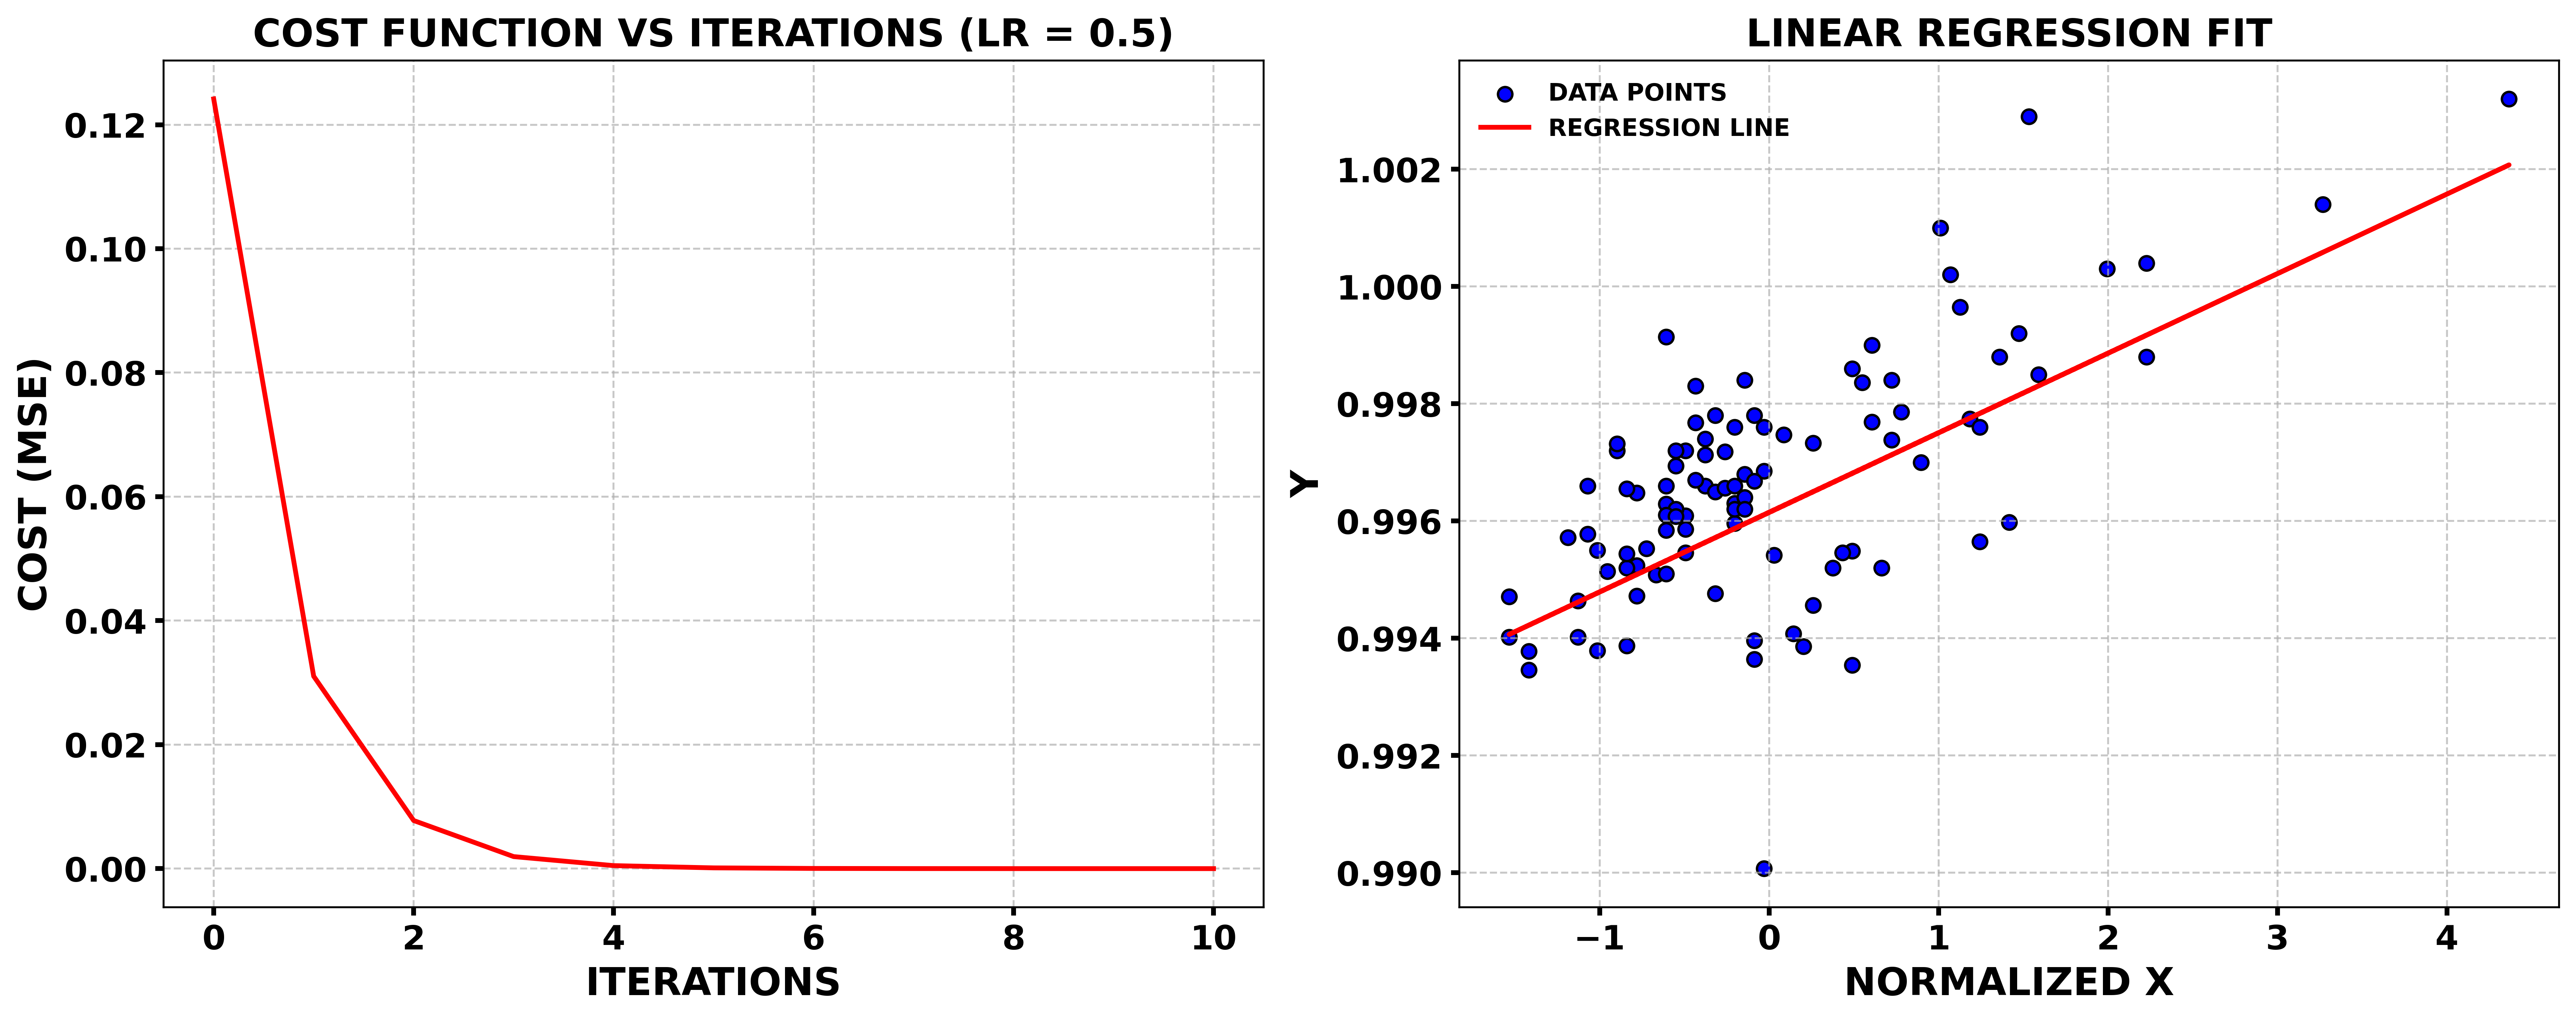

In [41]:
# CREATING FIGURE WITH TWO SUBPLOTS
plt.figure(figsize = (15,6), dpi = 500)

# SUBPLOT 1: COST FUNCTION VS ITERATION
plt.subplot(1, 2, 1)
plt.plot(range(len(cost_final)), cost_final, color = 'red', linewidth = 2)
plt.title("COST FUNCTION VS ITERATIONS (LR = 0.5)", fontsize=16, fontweight='bold')
plt.xlabel("ITERATIONS", fontsize=16, fontweight='bold')
plt.ylabel("COST (MSE)", fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=14, width=2)

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.7)

# SUBPLOT 2: REGRESSION LINE FIT
plt.subplot(1, 2, 2)
predictions = model.predict(X)

# SCATTER PLOT OF ORIGINAL DATA
plt.scatter(X, y, color = 'blue', edgecolor='black', label="DATA POINTS")

# PLOTTING THE REGRESSION LINE
plt.plot(X, predictions, color = 'red', linewidth = 2, label="REGRESSION LINE")

plt.title("LINEAR REGRESSION FIT", fontsize=16, fontweight='bold')
plt.xlabel("NORMALIZED X", fontsize=16, fontweight='bold')
plt.ylabel("Y", fontsize=16, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=14, width=2)

for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=16, frameon=False, prop={'weight': 'bold'})

plt.tight_layout()
plt.show()

## LEARNING RATE COMPARISON 

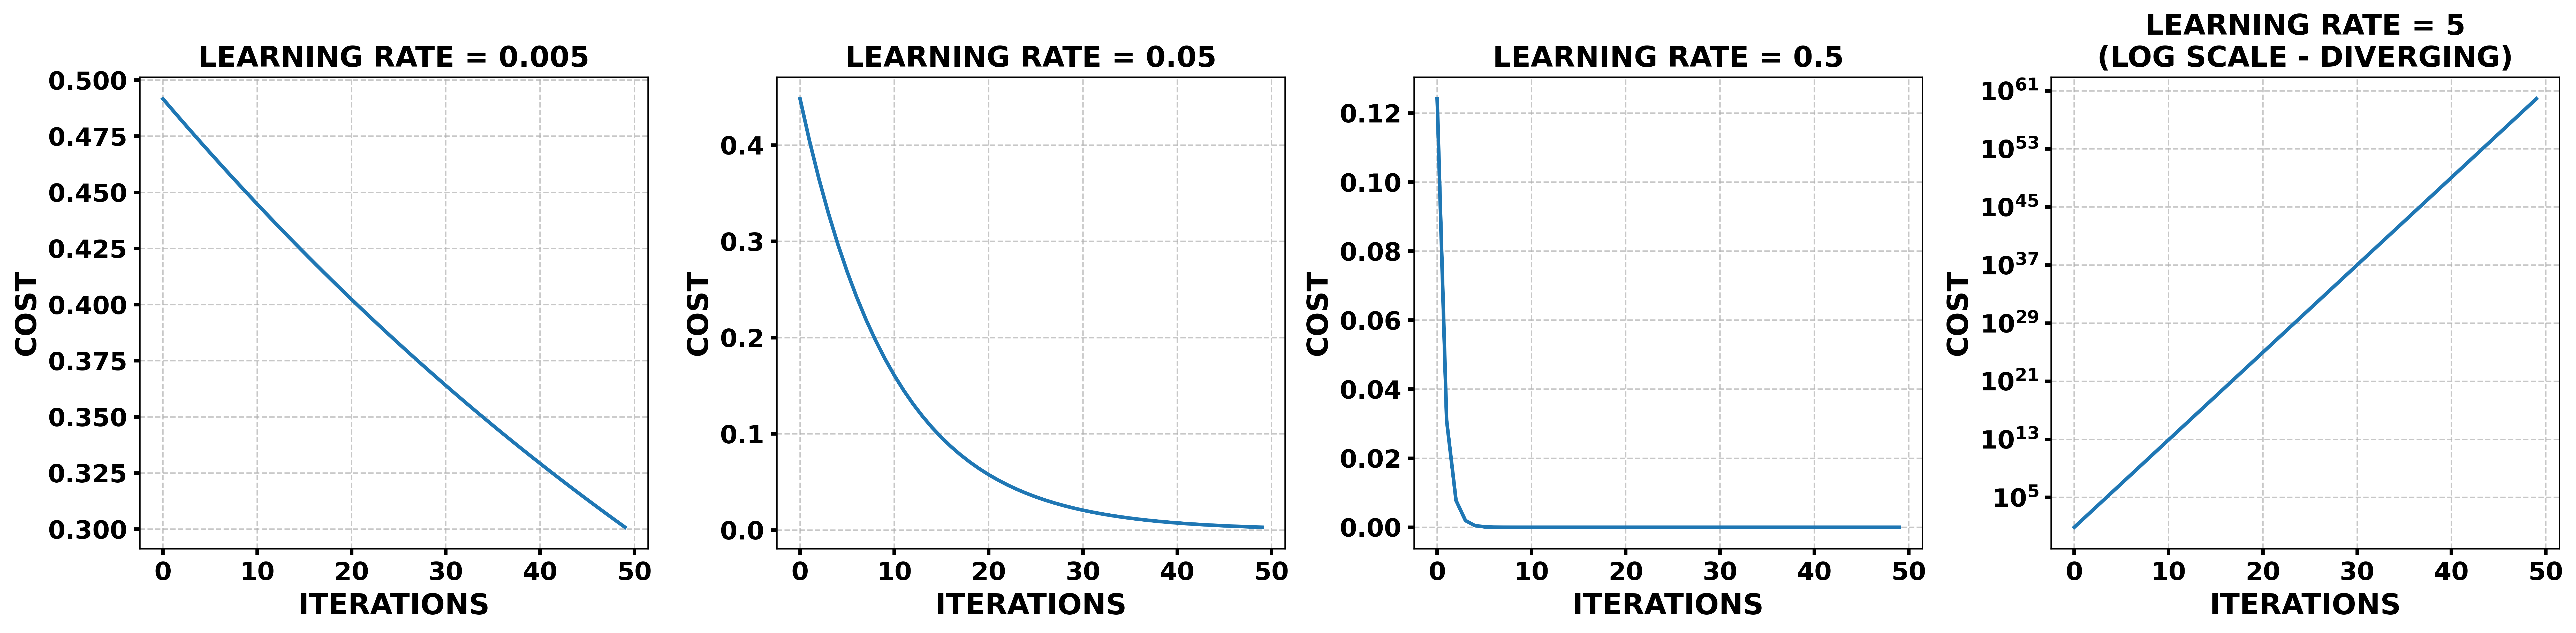

In [52]:
# DEFINING LEARNING RATES
learning_rates = [0.005, 0.05, 0.5, 5]
histories = {}

plt.figure(figsize = (20,5), dpi = 500)

for i, lr in enumerate(learning_rates):
    # TRAINING MODEL FOR EACH LEARNING RATE
    temp_model = LinearRegression(learning_rate=lr, iterations=50)
    __, _, cost_hist = temp_model.train(X, y, method='batch')
    histories[lr] = cost_hist
    
    # PLOTTING
    plt.subplot(1, 4, i + 1)
    plt.plot(range(len(cost_hist)), cost_hist, linewidth=2)

    plt.title(f"LEARNING RATE = {lr}", fontsize=16, fontweight='bold')
    plt.xlabel("ITERATIONS", fontsize=16, fontweight='bold')
    plt.ylabel("COST", fontsize=16, fontweight='bold')

    plt.tick_params(axis='both', which='major', labelsize=14, width=2)
    for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
        label.set_fontweight('bold')

    plt.grid(True, linestyle='--', alpha=0.7)
    
    # HANDLING EXPLODING GRADIENT VISUALIZATION
    if cost_hist[-1] > 1e10:
        plt.yscale('log')
        plt.title(f"LEARNING RATE = {lr}\n(LOG SCALE - DIVERGING)", fontsize=16, fontweight='bold')
        
plt.tight_layout()
plt.show()

## CONVERGENCE ANALYSIS

CONVERGED AT ITERATION 849
CONVERGED AT ITERATION 106
CONVERGED AT ITERATION 10


C:\Users\KIIT\AppData\Local\Temp\ipykernel_28512\643754959.py:19: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(error ** 2)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_28512\643754959.py:87: RuntimeWarning: invalid value encountered in scalar subtract
  if i > 0 and abs(self.cost_history[-2] - self.cost_history[-1]) < self.convergence:
C:\Users\KIIT\AppData\Local\Temp\ipykernel_28512\643754959.py:44: RuntimeWarning: invalid value encountered in scalar subtract
  self.bias -= self.lr * db


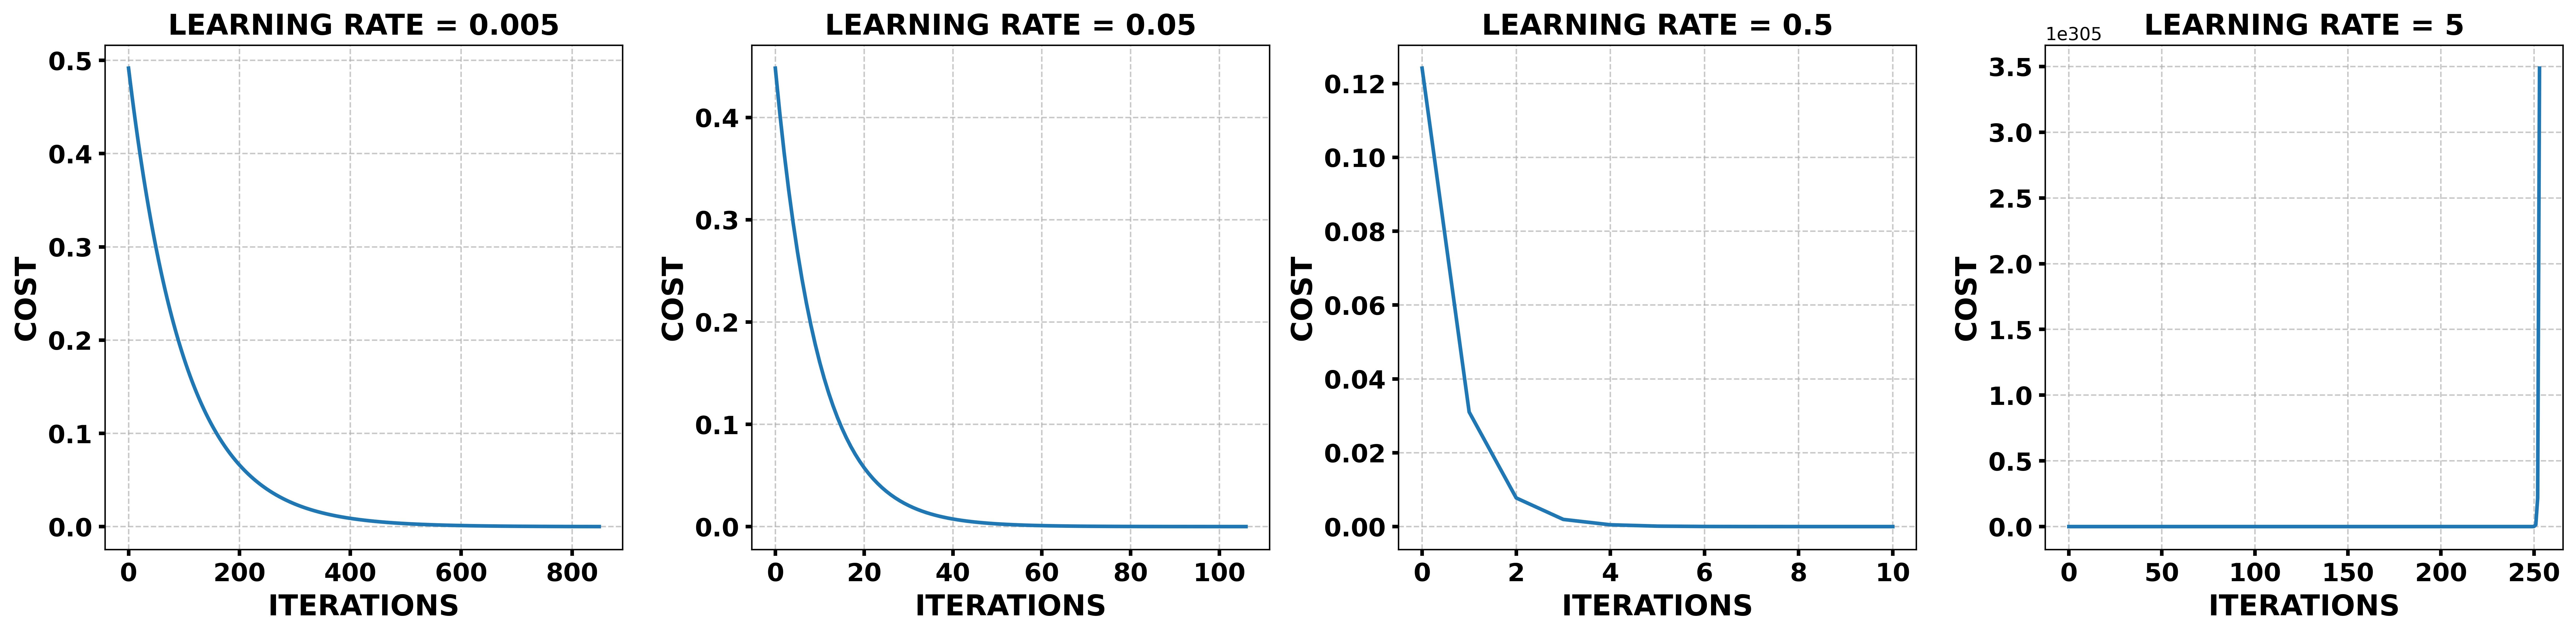

OBSERVATION--> 
LR = 0.005 SHOWS VERY SLOW CONVERGENCE DUE TO SMALL STEP SIZE. 
LR = 0.05 CONVERGES STEADILY BUT REQUIRES MORE ITERATIONS. 
LR = 0.5 ACHIEVES FAST AND STABLE CONVERGENCE, INDICATING OPTIMAL LEARNING RATE. 
LR = 5 DIVERGES RAPIDLY, DEMONSTRATING THE EFFECT OF AN EXCESSIVELY LARGE LEARNING RATE CAUSING GRADIENT EXPLOSION.


In [54]:
# DEFINING LEARNING RATES
learning_rates = [0.005, 0.05, 0.5, 5]
histories = {}

plt.figure(figsize = (20,5), dpi = 500)

for i, lr in enumerate(learning_rates):
    # TRAINING MODEL FOR EACH LEARNING RATE
    temp_model = LinearRegression(learning_rate=lr, iterations=1000)
    __, _, cost_hist = temp_model.train(X, y, method='batch')
    histories[lr] = cost_hist
    
    # PLOTTING
    plt.subplot(1, 4, i + 1)
    plt.plot(range(len(cost_hist)), cost_hist, linewidth=2)

    plt.title(f"LEARNING RATE = {lr}", fontsize=16, fontweight='bold')
    plt.xlabel("ITERATIONS", fontsize=16, fontweight='bold')
    plt.ylabel("COST", fontsize=16, fontweight='bold')

    plt.tick_params(axis='both', which='major', labelsize=14, width=2)
    for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
        label.set_fontweight('bold')

    plt.grid(True, linestyle='--', alpha=0.7)
    
    # HANDLING EXPLODING GRADIENT VISUALIZATION
    if cost_hist[-1] > 1e10:
        plt.yscale('log')
        plt.title(f"LEARNING RATE = {lr}\n(LOG SCALE - DIVERGING)", fontsize=16, fontweight='bold')
        
plt.tight_layout()
plt.show()

print("OBSERVATION--> \nLR = 0.005 SHOWS VERY SLOW CONVERGENCE DUE TO SMALL STEP SIZE. \nLR = 0.05 CONVERGES STEADILY BUT REQUIRES MORE ITERATIONS. "
      "\nLR = 0.5 ACHIEVES FAST AND STABLE CONVERGENCE, INDICATING OPTIMAL LEARNING RATE. \nLR = 5 DIVERGES RAPIDLY, DEMONSTRATING THE EFFECT OF AN EXCESSIVELY LARGE LEARNING RATE CAUSING GRADIENT EXPLOSION.")        

## BATCH VS STOCHASTIC VS MINI-BATCH 

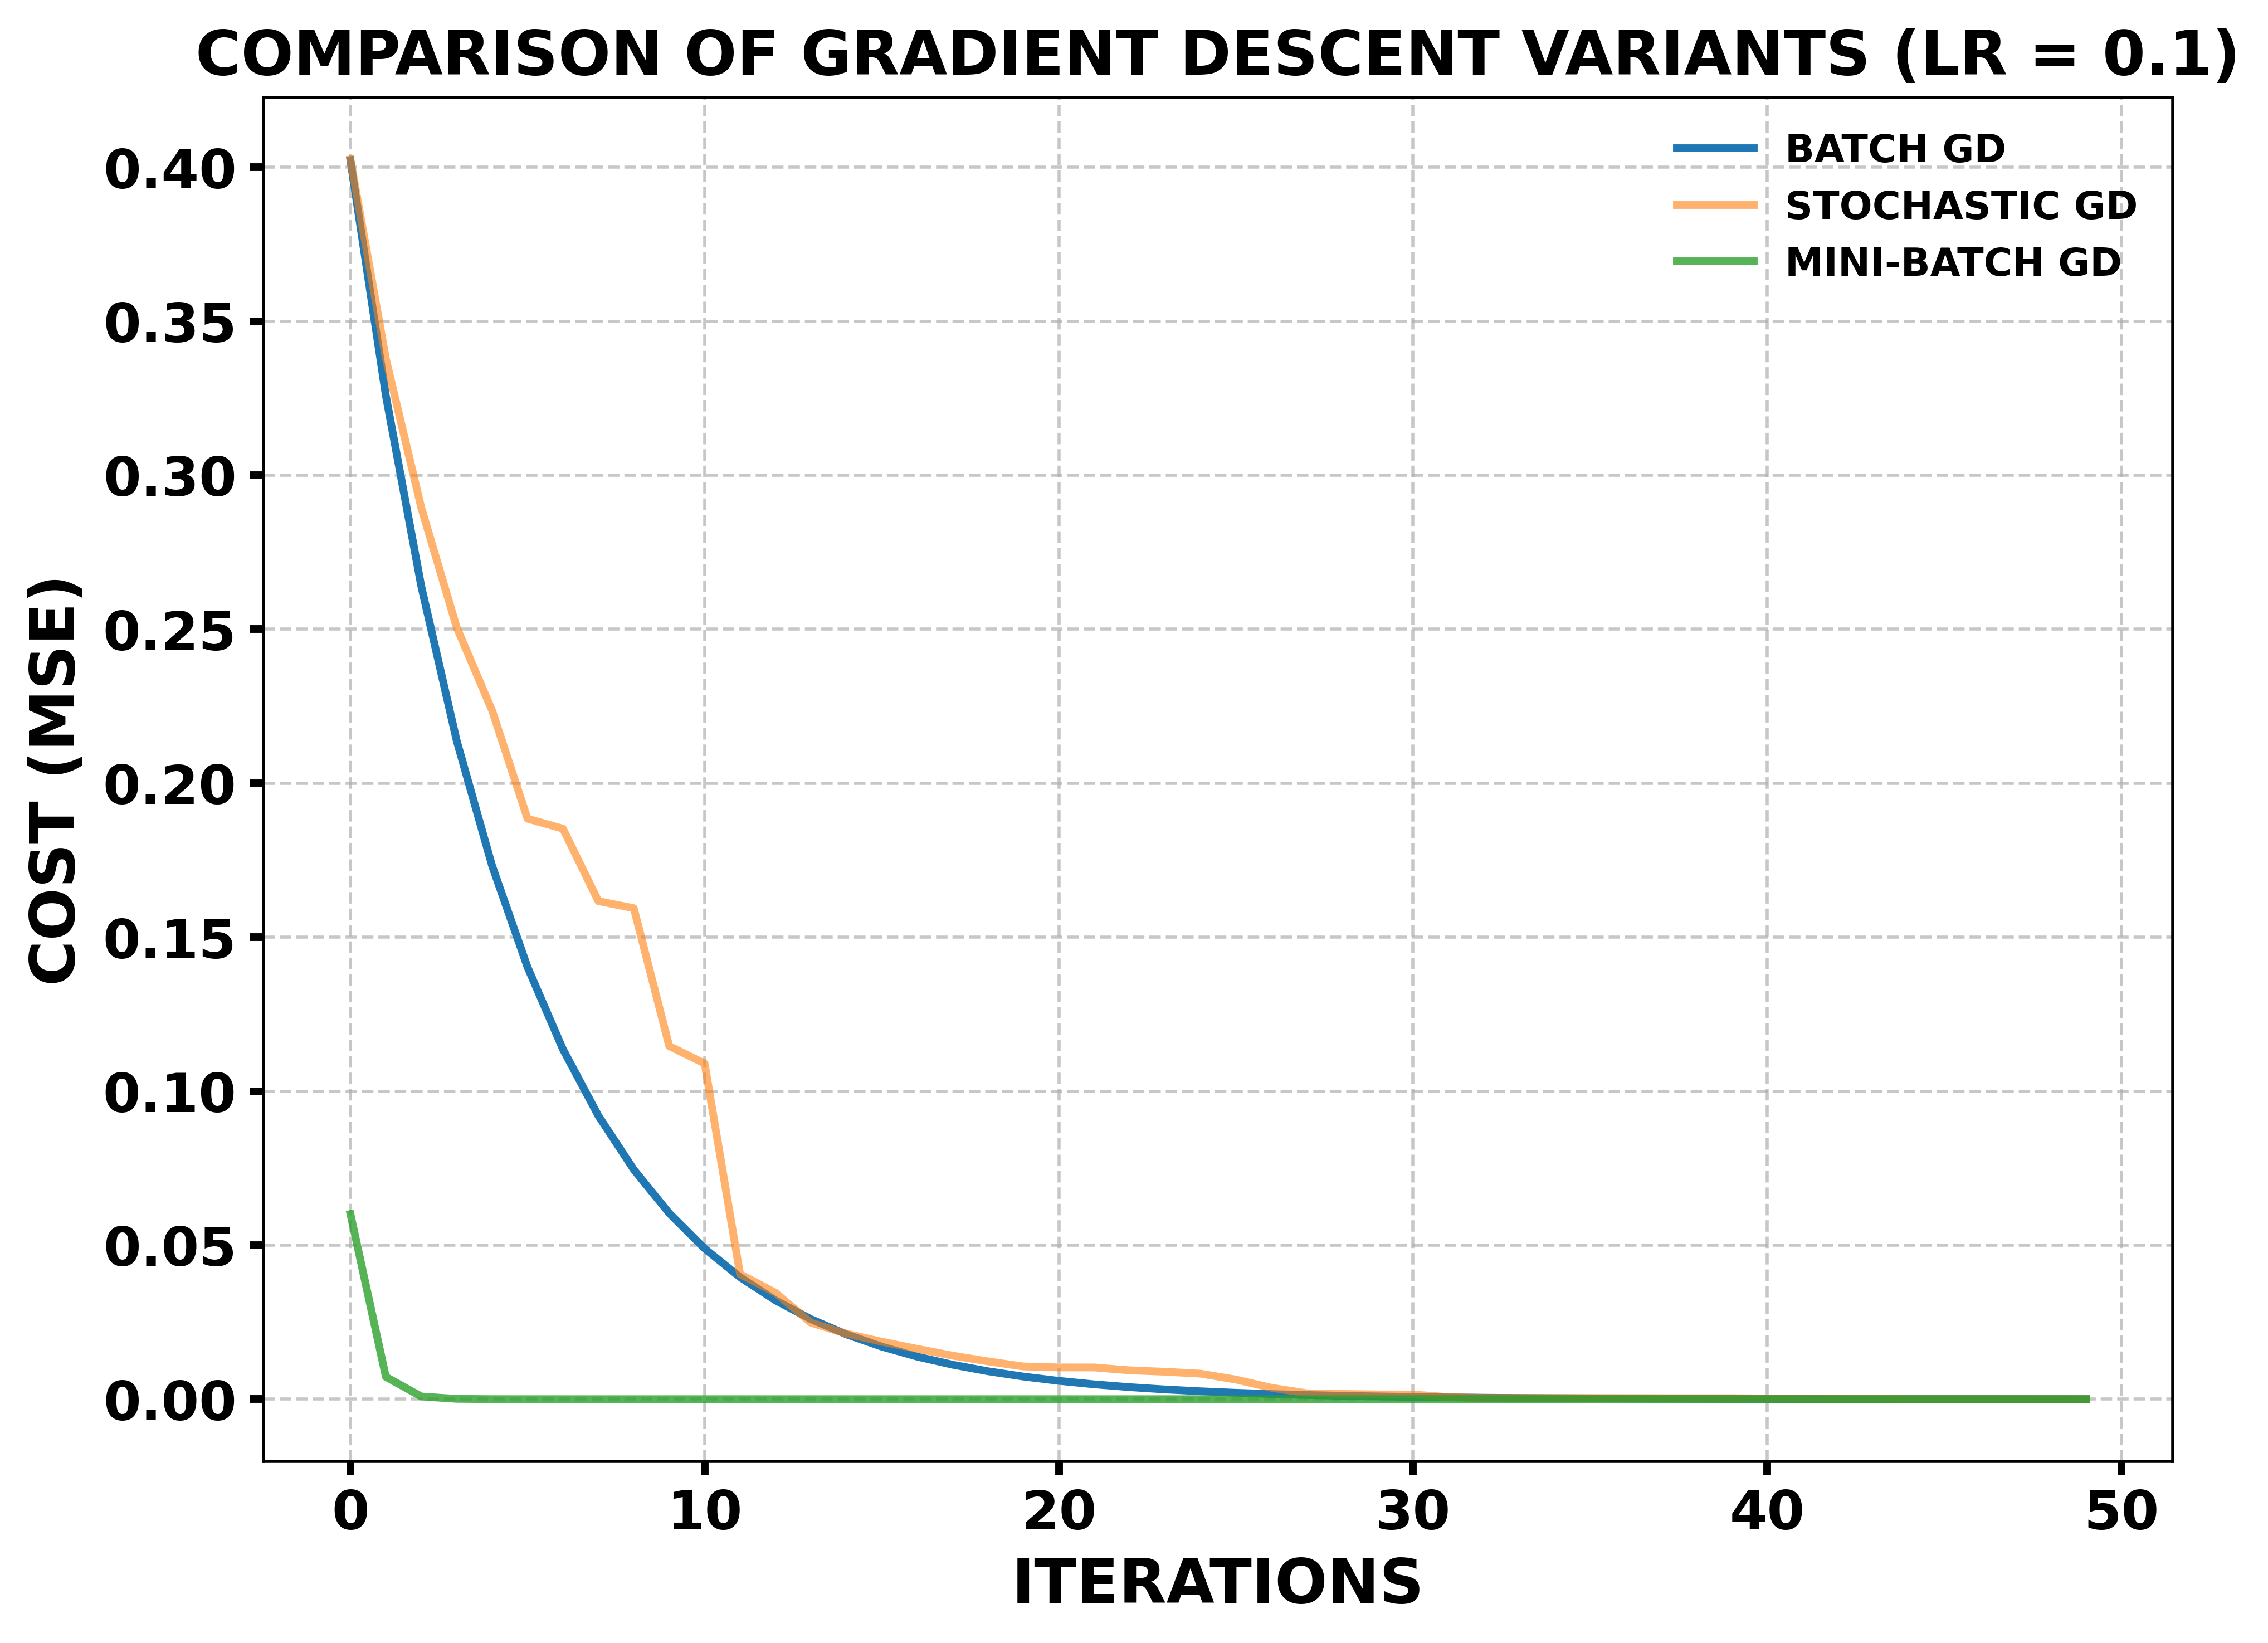

In [63]:
# TRAINING WITH DIFFERENT METHODS 
# USING LR=0.1 FOR STABILITY ACROSS METHODS

model_batch = LinearRegression(learning_rate=0.1, iterations=50)
_, _, batch_cost = model_batch.train(X, y, method='batch')

model_sgd = LinearRegression(learning_rate=0.1, iterations=50)
_, _, sgd_cost = model_sgd.train(X, y, method='stochastic')

model_mini = LinearRegression(learning_rate=0.1, iterations=50)
_, _, mini_cost = model_mini.train(X, y, method='minibatch', batch_size=10)

# PLOTTING COMPARISON
plt.figure(figsize=(8, 6), dpi=500)

plt.plot(batch_cost, label="BATCH GD", linewidth=2)
plt.plot(sgd_cost, label="STOCHASTIC GD", linewidth=2, alpha=0.6)
plt.plot(mini_cost, label="MINI-BATCH GD", linewidth=2, alpha=0.8)

plt.title("COMPARISON OF GRADIENT DESCENT VARIANTS (LR = 0.1)", fontsize=16, fontweight='bold')
plt.xlabel("ITERATIONS", fontsize=16, fontweight='bold')
plt.ylabel("COST (MSE)", fontsize=16, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=14, width=2)
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=16, frameon=False, prop={'weight': 'bold'})

plt.tight_layout()
plt.show()